# $$
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
\def\com#1{\color{blue}{\textrm{#1}}} 
$$
# Lab2: Uncertainties and Dimensions

- Submit your lab by dropping this notebook with your answers into `dropbox`. 

- __Rename your notebook to__ `Lab2_yourLoginName.ipynb` before submitting it by dragging it onto the dropbox folder. You can confirm submission (and resubmit up to the deadline), by repreating the process. If you are asked whether to replace the file, this confirms it has been successfully submitted to the dropbox. __Please confirm your submission__.

- __Due:__ 1pm Wednesday 11th March.

$\com{Please leave this command for marker's comments}$

# A. Vertical motion
A Ball is thrown vertically upwards against gravity with an initial velocity $v_0$. In this problem you will find the time $t$ at which the ball reaches a given height $h$. 

The equation of motion is (which way is "up" here?)

$$ \frac{d^2y}{dt^2}=-g,$$

and together with the initial velocity $v_0$, and position $y_0$, this information specifies the solution. Taking the initial time to be $t=0$, we have $v(t)=v_0-gt$, and hence

$$y(t)=y_0+v_0t-\tfrac{1}{2}gt^2.$$

Take $y_0=0$ as your reference point from which the mass is launched.

1. Find an equation expressing the condition that $y(t)=h$, and write it in the form $F(t)=0$. 
1. Solve the quadratic equation for the roots of the equation, and determine any constraints (physical or otherwise) on their existence. Find the minimum value of $v_0$ for which solutions exist. What does this mean physically? 
1. We are going to use the [Measurements](https://github.com/JuliaPhysics/Measurements.jl) package (Lecture 4) to solve this problem for particular parameters and their uncertainties: 
    - $g=9.81\pm 0.014\textrm{ms}^{-2}$
    - $m=23\pm 0.0037 \textrm{kg}$
    - $v_0=21\pm 0.1 \textrm{ms}^{-1}$
    - $h=20 \pm 0.4\textrm{m}$
    - $y_0=0.0 \pm 0.018\textrm{m}$
    
    Load the package and define the parameters. You can type `\pm<tab>` to get the $\pm$ symbol for entering uncertainties. 
1. Use the syntax [described on this page](https://juliaphysics.github.io/Measurements.jl/stable/examples/#Integration-with-Plots.jl-1) to plot $y(t)$ with uncertainties over time. Assume your clock recording the times associated with each observed height is only accurate to $\pm 0.1\textrm{s}$. Plot the height of the mass as a function of time, together with errorbars that show the estimated uncertainty according to linear error propagation theory. On the same plot, show a line of constant height $h$ for the value shown above including error. Limit your plot axes to the range $0<x<7$, $-20<y<60$ \[e.g. `xlims!(0,5)` will modify the current plot\]. Estimate the roots by zooming in on the points where the lines cross (You can just use `xlims!`, `ylims!` for this).
1. Evaluate your solutions found using the quadratic formula, and report the values including uncertainties. 
1. Express the equation for the curve crossing in the form $F(t)=0$, and plot $F(t)$ versus $t$ to get an estimate for where the solutions (roots) lie. You should be able to get quite accurate solutions by enlarging regions of the plot. Is this graphical approach giving results consistent with your previous plot of $y(t)$?
1. To find solutions numerically you will need to use a **root finding** algorithm. Use the julia package [Roots](https://github.com/JuliaMath/Roots.jl) (you may need to install it) to find as many solutions for $t$ as roots of $F(t)$ as you can, for the chosen parameters. Do the errors reported by rootfinding agree with those of your exact solution? Is this what you expect?

__Hint:__ You will need to "bracket" each root, by providing an interval in which the root finder will search.

**Notes:** 
1. You should use the equations in SI units for this part of the lab, but you shouldn't explicitly enter units (i.e. don't worry about using `Unitful`).
2. Your notebook should include a clear statement of the equations used, and a concise discussion that interprets your findings. Do your answers make sense? How did you check your results?

In [162]:
# Imports
import Pkg;
Pkg.add("Measurements");
Pkg.add("Roots");
Pkg.add("Unitful");
Pkg.add("QuadGK");
Pkg.add("PhysicalConstants");
Pkg.add("ForwardDiff");

using Measurements;
using Plots;
using Roots;
using Unitful;
using QuadGK;
using PhysicalConstants.CODATA2018;
using ForwardDiff;

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
  [f6369f11] + ForwardDiff v0.10.9
  Updating `~/.julia/environments/v1.3/Manifest.tom

┌ Info: Precompiling ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1273


In [146]:
# Code for A(2)
discriminant(a, b, c) = b^2 - 4*a*c
function findRoots(a, b, c)
    positiveRoot = (1/(2*a))*(-b + sqrt(discriminant(a, b, c)))
    negativeRoot = (1/(2*a))*(-b - sqrt(discriminant(a, b, c)))
    
    return (positiveRoot, negativeRoot)
end

# Code for A(3)
g = 9.8 ± 0.014
m = 23 ± 0.0037
v_0 = 21 ± 0.1
h = 20 ± 0.4
y_0 = 0.0 ± 0.018

# Code for A(5)
roots = findRoots(-1/2*g, v_0, -h)
println("Roots founds using the quadratic formula are: ", roots[1], " and ", roots[2])

# Code for A(7)
y(t) = -1/2*g*t^2 + v_0*t - h
numericalRoots = (find_zero(y, (1 ± 0.1, 2 ± 0.1)), find_zero(y, (2.5 ± 0.1, 3 ± 0.1)))
println("Roots found numerically are: ", numericalRoots[1], " and ", numericalRoots[2])

Roots founds using the quadratic formula are: 1.429 ± 0.061 and 2.857 ± 0.071
Roots found numerically are: 1.429 ± 0.061 and 2.857 ± 0.071


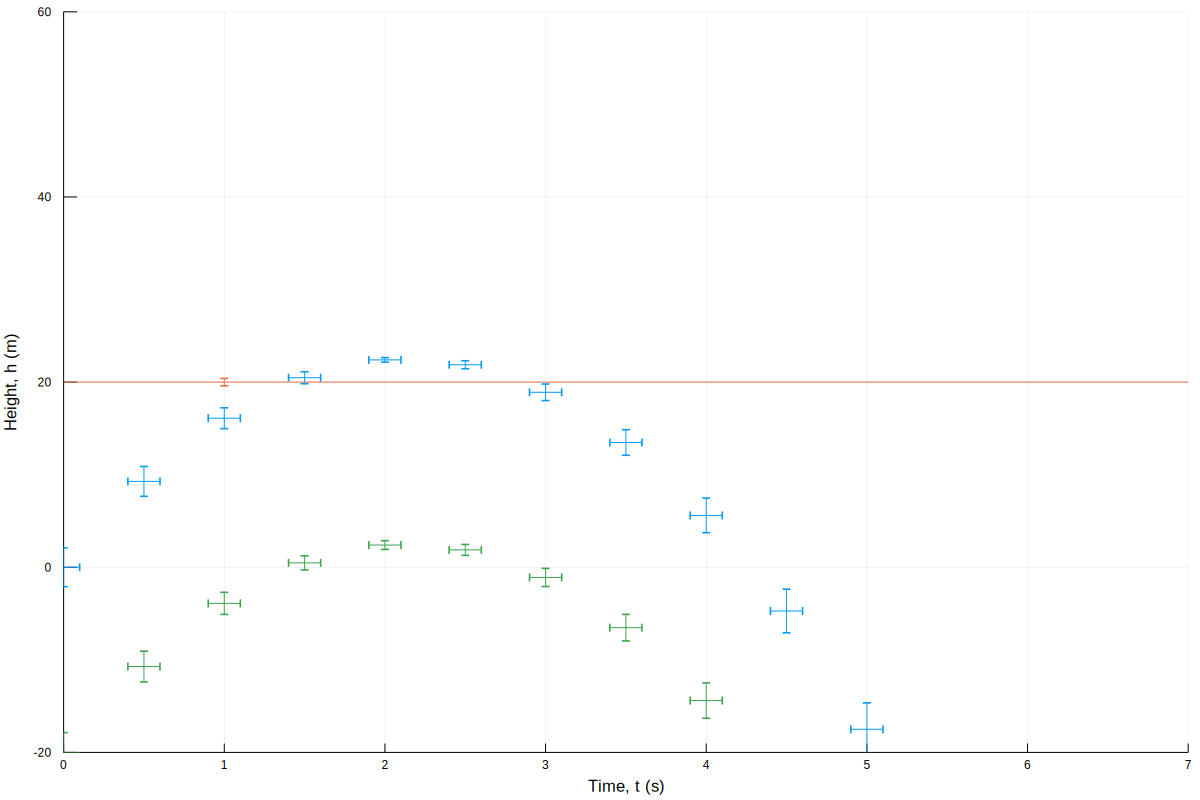

In [105]:
# Code for A(4)
time = collect(0:0.5:500)
y(t) = -1/2*g*t^2 + v_0*t
plot(y, [t ± 0.1 for t in time], size = (1200, 800), legend=false)
plot!([h ± 0.4], seriestype="hline")

# Code for A(6)
F(t) = -1/2*g*t^2 + v_0*t - h
plot!(F, [t ± 0.1 for t in time], size = (1200, 800), legend=false)

# Plots attributes
xlabel!("Time, t (s)")
ylabel!("Height, h (m)")
xlims!(0, 7)
ylims!(-20, 60)

# A. Answers
1. The equation expressing the condition that $y(t) = h$ is $y(t) = - \frac{1}{2}gt^2 + v_0t  = h$. This condition in the form $F(t)=0$ is $F(t) =  - \frac{1}{2}gt^2 + v_0t - h = 0$ 

2. The roots of the equation are: $\frac{-v_0 \ \pm \ \sqrt{v_0^2 - 2gh}}{-g}$. The physical constraints are that the initial velocity has to be greater than or equal to $\sqrt{2gh}$.

4. The roots are at approximately 1.5 and 2.8

5. The roots found using the quadratic formula are 1.429 ± 0.021 and 2.857 ± 0.042

# B. Blackbody radiation

In this part of the laboratory you will study blackbody radiation. We require root finding package [Roots](https://github.com/JuliaMath/Roots.jl), and numerical integrator [QuadGK](https://github.com/JuliaMath/QuadGK.jl).

For blackbody radiation, the radiant energy per unit volume in the wavelength range $\lambda$ to $\lambda+d\lambda$ is
$$ 
u(\lambda)d\lambda =\frac{8\pi}{\lambda^5}\frac{hc}{\exp{(hc/\lambda k_B T)}-1}d\lambda
$$
where $T$ is the temperature of the body, $c$ is the speed of light, $h$ is Plank's constant, and $k_B$ is Boltzmann's constant. 

1. Write this equation in an appropriate choice of dimensionless units. Your aim is to introduce units for each dimensional quantity, e.g. $\lambda = x_0\bar \lambda$, and then make a choice of units that simplifies the expression. Show concisely how you arrived at the dimensionless form of the equations. Plot $\bar u(\bar\lambda)$ versus $\bar\lambda$ over an interval of $\bar\lambda$ that shows the essential features of the function.

1. Derive the equation that allows you to determine the wavelength $\lambda_{\rm max}$ at which the maximum radiation energy density occurs [__Hint:__ recall you can find the peak of a function by differentiating and finding where that is zero]. 

1. Find the location of the peak using root-finding.

1. Find the total radiant energy per unit volume in dimensionless units to 8 significant figures by numerically integrating $\bar u(\bar\lambda)$ over a suitable interval of wavelengths. What is the interval? [Hint: pay attention to the error in the result]. 

# B. Answers
1. Simplifying exp(hc/ lambda * k_b * T):
Let lambda bar, the characteristic unit of measure = 